#Final Assignment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from google.colab import files

In [ ]:
def IC(n, problem):
    
    if (problem == "shallow_water"):

        dim = 2
        q = np.zeros([dim,n]) # first row is the height and second row is the speed
        g = 1
        
        x_b_l = -5.0 # left boundary
        x_b_r = 5.0 # right boundary
        
        x = np.linspace(x_b_l, x_b_r, n) # Initializing the spatial domain
        dx = x[1] - x[0]
        
        x_ic = 0
        
        n_disc = int((x_ic - x_b_l)/dx)
        
        q[0,0:n_disc] = 3.0
        q[0,n_disc:] = 1.0
        
        q[1,n_disc:] = 0.0

    elif (problem == "sod_shock"):

        dim = 3 # dimension
        q = np.zeros([dim,n]) # first row is the height and second row is the speed
        g = 1.4
        
        rho_b_l = 1.0 # left boundary
        rho_b_r = 0.125 # right boundary

        u_b_l = 0.0 # left boundary
        u_b_r = 0.0 # right boundary

        p_b_l = 1.0 # left boundary
        p_b_r = 0.1 # right boundary

        x_b_l = 0.0
        x_b_r = 1.0
        
        x = np.linspace(x_b_l, x_b_r, n) # Initializing the spatial domain
        dx = x[1] - x[0]
        
        x_ic = 0.5
        
        n_disc = int((x_ic - x_b_l)/dx)
        
        q[0,0:n_disc] = rho_b_l
        q[0,n_disc:] = rho_b_r

        q[1,0:n_disc] = rho_b_l*u_b_l
        q[1,n_disc:] = rho_b_l*u_b_r

        q[2,0:n_disc] = p_b_l/(g-1) + 0.5*rho_b_l*u_b_l**2
        q[2,n_disc:] = p_b_r/(g-1) + 0.5*rho_b_r*u_b_r**2

    
    return(x, q, dx, g, dim, x_b_l, x_b_r)

In [ ]:
def linearize_shallow_water(n, q, g, T, dx, dim, type):
    
    n_hat = n-2
    
    u = np.zeros(n) # This is actually wrong, u should be an input from the IC and has to be passed into the function
    
    q_minus_hat = np.zeros([dim, n_hat])
    q_plus_hat = np.zeros([dim, n_hat])

    diff_q_minus = np.zeros([dim, n_hat])
    diff_q_plus = np.zeros([dim, n_hat])
    
    u_minus_hat = np.zeros(n_hat)
    u_plus_hat = np.zeros(n_hat)
    
    c_minus_hat = np.zeros(n_hat)
    c_plus_hat = np.zeros(n_hat)
    
    lamda_1_minus_hat = np.zeros(n_hat)
    lamda_1_plus_hat = np.zeros(n_hat)
    
    lamda_2_minus_hat = np.zeros(n_hat)
    lamda_2_plus_hat = np.zeros(n_hat)    
    
    r_1_minus_hat = np.zeros([dim,n_hat])
    r_1_plus_hat = np.zeros([dim,n_hat])
    
    r_2_minus_hat = np.zeros([dim,n_hat])
    r_2_plus_hat = np.zeros([dim,n_hat])
    
    R_minus = np.zeros([n_hat,dim,dim])
    R_plus = np.zeros([n_hat,dim,dim])
    
    a_minus_hat = np.zeros([dim,n_hat])
    a_plus_hat = np.zeros([dim,n_hat])
    
    nu_1_minus = np.zeros(n_hat)
    nu_1_plus = np.zeros(n_hat)
    nu_2_minus = np.zeros(n_hat)
    nu_2_plus = np.zeros(n_hat)
    
    diff_f1_minus = np.zeros([dim,n_hat])
    diff_f1_plus = np.zeros([dim,n_hat])
    
    diff_f2_minus = np.zeros([dim,n_hat])
    diff_f2_plus = np.zeros([dim,n_hat])    

    f_minus = np.zeros([dim, n_hat])
    f_plus = np.zeros([dim, n_hat])    

    F_minus = np.zeros([dim, n_hat])
    F_plus = np.zeros([dim, n_hat]) 
    
    q_new = copy.deepcopy(q)
    
    t = 0
    
    CFL = 0.6
    
    count = 0
    
    while(t<T):  

        u = q[1,:]/q[0,:]        

        q_minus_hat[0,:] = 0.5*(q[0,1:-1] + q[0,0:-2])    
        q_plus_hat[0,:] = 0.5*(q[0,2:] + q[0,1:-1])          

        f_minus[0,:] = 0.5*(q[1,1:-1] + q[1,0:-2])                
        f_plus[0,:] = 0.5*(q[1,2:] + q[1,1:-1])

        f_minus[1,:] = 0.5*(q[1,1:-1]**2/q[0,1:-1] + 0.5*g*q[0,1:-1]**2 + q[1,0:-2]**2/q[0,0:-2] + 0.5*g*q[0,0:-2]**2)
        f_plus[1,:] = 0.5*(q[1,2:]**2/q[0,2:] + 0.5*g*q[0,1:-1]**2 + q[1,1:-1]**2/q[0,1:-1] + 0.5*g*q[0,1:-1]**2)
        
        u_minus_hat[:] = ((q[0,1:-1]**(0.5))*u[1:-1] + (q[0,0:-2]**(0.5))*u[0:-2])/(q[0,1:-1]**0.5 + q[0,0:-2]**0.5)
        u_plus_hat[:] = ((q[0,2:]**(0.5))*u[2:] + (q[0,1:-1]**(0.5))*u[1:-1])/(q[0,2:]**0.5 + q[0,1:-1]**0.5) 
        
        q_minus_hat[1,:] = q_minus_hat[0,:]*u_minus_hat[:]
        q_plus_hat[1,:] = q_plus_hat[0,:]*u_plus_hat[:]
        
        c_minus_hat[:] = (g*q_minus_hat[0,:])**0.5
        c_plus_hat[:] = (g*q_plus_hat[0,:])**0.5
        
        lamda_1_minus_hat = u_minus_hat - c_minus_hat
        lamda_1_plus_hat = u_plus_hat - c_plus_hat
        
        lamda_2_minus_hat = u_minus_hat + c_minus_hat
        lamda_2_plus_hat = u_plus_hat + c_plus_hat

        r_1_minus_hat[0,:] = np.ones(n_hat)
        r_1_minus_hat[1,:] = lamda_1_minus_hat[:]

        r_1_plus_hat[0,:] = np.ones(n_hat)
        r_1_plus_hat[1,:] = lamda_1_plus_hat[:]

        r_2_minus_hat[0,:] = np.ones(n_hat)
        r_2_minus_hat[1,:] = lamda_2_minus_hat[:]

        r_2_plus_hat[0,:] = np.ones(n_hat)
        r_2_plus_hat[1,:] = lamda_2_plus_hat[:]

        for i in range(n_hat):
            R_minus[i,0,0] = r_1_minus_hat[0,i]
            R_minus[i,0,1] = r_2_minus_hat[0,i]
            R_minus[i,1,0] = r_1_minus_hat[1,i]
            R_minus[i,1,1] = r_2_minus_hat[1,i]

            R_plus[i,0,0] = r_1_plus_hat[0,i]
            R_plus[i,0,1] = r_2_plus_hat[0,i]
            R_plus[i,1,0] = r_1_plus_hat[1,i]
            R_plus[i,1,1] = r_2_plus_hat[1,i]
        

        diff_q_minus[0,:] = q[0,1:-1] - q[0,0:-2]        
        diff_q_plus[0,:] = q[0,2:] - q[0,1:-1]
        diff_q_minus[1,:] = q[1,1:-1] - q[1,0:-2]
        diff_q_plus[1,:] = q[1,2:] - q[1,1:-1]

        for i in range(n_hat):
            a_minus_hat[:,i] = np.linalg.inv(R_plus[i]) @ diff_q_minus[:,i]
            a_plus_hat[:,i] = np.linalg.inv(R_minus[i]) @ diff_q_plus[:,i]


        for i in range(n_hat):
            
            if (type == "ROE"):

              diff_f1_minus[:,i] = abs(lamda_1_minus_hat)[i]*(a_minus_hat[0,i] * r_1_minus_hat[:,i])
              diff_f2_minus[:,i] = abs(lamda_2_minus_hat[i])*(a_minus_hat[1,i] * r_2_minus_hat[:,i])
              diff_f1_plus[:,i] = abs(lamda_1_plus_hat[i])*(a_plus_hat[0,i] * r_1_plus_hat[:,i])
              diff_f2_plus[:,i] = abs(lamda_2_plus_hat[i])*(a_plus_hat[1,i] * r_2_plus_hat[:,i])
              
              F_minus = f_minus - 0.5*(diff_f1_minus + diff_f2_minus)
              F_plus = f_plus - 0.5*(diff_f1_plus + diff_f2_plus)

            elif (type == "FDS"):

              diff_f1_minus[:,i] = (lamda_1_minus_hat)[i]*(a_minus_hat[0,i] * r_1_minus_hat[:,i])
              diff_f2_minus[:,i] = (lamda_2_minus_hat[i])*(a_minus_hat[1,i] * r_2_minus_hat[:,i])
              diff_f1_plus[:,i] = (lamda_1_plus_hat[i])*(a_plus_hat[0,i] * r_1_plus_hat[:,i])
              diff_f2_plus[:,i] = (lamda_2_plus_hat[i])*(a_plus_hat[1,i] * r_2_plus_hat[:,i])              

              

        max_lamda = max(max(abs(lamda_1_plus_hat[:])),max(abs(lamda_2_plus_hat[:])),max(abs(lamda_1_minus_hat[:])),max(abs(lamda_2_minus_hat[:])))           
        dt = 0.75*dx*CFL/max_lamda          

        nu_1_minus = lamda_1_minus_hat*dt/dx
        nu_1_plus = lamda_1_plus_hat*dt/dx
        nu_2_minus = lamda_2_minus_hat*dt/dx
        nu_2_plus = lamda_2_plus_hat*dt/dx  

        
        if (type == "ROE"):
          q_new[:,1:-1] = q[:,1:-1] - (dt/dx)*(F_plus - F_minus)
        
        elif (type == "FDS"):
          q_new[:,1:-1] = q[:,1:-1] - (dt/dx)*(0.5*(1 + nu_1_minus[:])*diff_f1_minus[:,] + 
                                             0.5*(1 - nu_1_plus[:])*diff_f1_plus[:,] + 
                                             0.5*(1 + nu_2_minus[:])*diff_f2_minus[:,] + 
                                             0.5*(1 - nu_2_plus[:])*diff_f2_plus[:,])

        
                
        q_new[:,0] = q_new[:,1]                
        q_new[:,-1] = q_new[:,-2]        
        q = copy.deepcopy(q_new)        

        t = t + dt
    
    return(q_new)


In [ ]:
def PLOT(q_new, q_old, x, x_b_l, x_b_r, time_stamp, LEGEND, grid_point, case, xlabel, ylabel, name):
  plt.figure(figsize=(7,7))
  plt.grid()
  plt.plot(x,q_new)
  plt.plot(x,q_old,"--")  
  plt.legend(["at "+ time_stamp + " sec " + LEGEND, "at t = 0 sec"])
  plt.title(case + " at " + grid_point + " Grid Points ")
  plt.xlim(x_b_l, x_b_r)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # plt.savefig(name)
  # files.download(name)

---
# Problem 1 | Shallow Water equation - Dam Break Problem
---



## Part 1 - 101 Grid Points
---


In [ ]:
n = 101
type = ["ROE", "FDS"]
[x, q, dx, g, dim, x_b_l, x_b_r] = IC(n, "shallow_water")
q_old = copy.deepcopy(q)

In [ ]:
T = 0.5
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

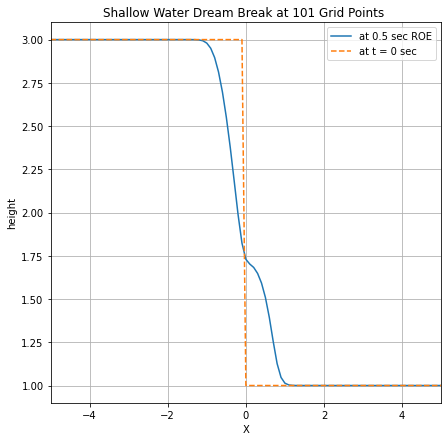

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "height"
name = "shallow_height_101_ROE_time_half_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

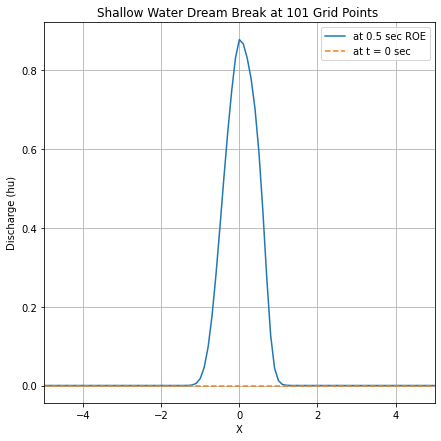

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Discharge (hu)"
name = "shallow_discharge_101_ROE_time_half_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel,name)

In [ ]:
T = 2.0
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

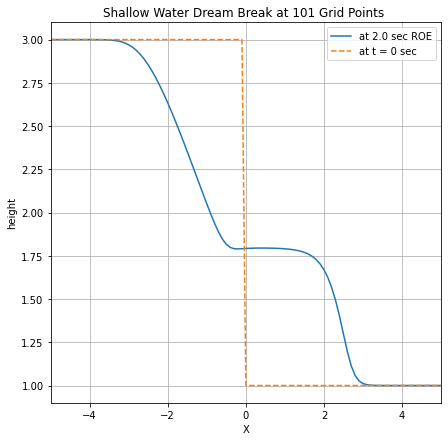

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "height"
name = "shallow_height_101_ROE_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

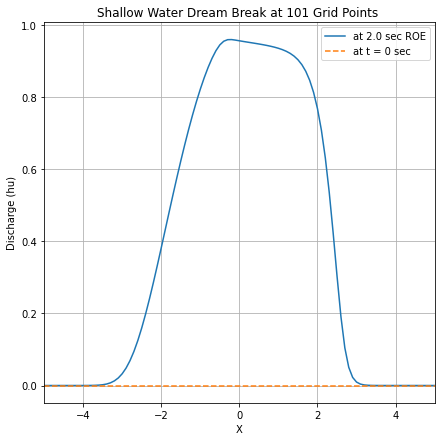

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Discharge (hu)"
name = "shallow_discharge_101_ROE_time_two_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

In [ ]:
T = 0.5
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

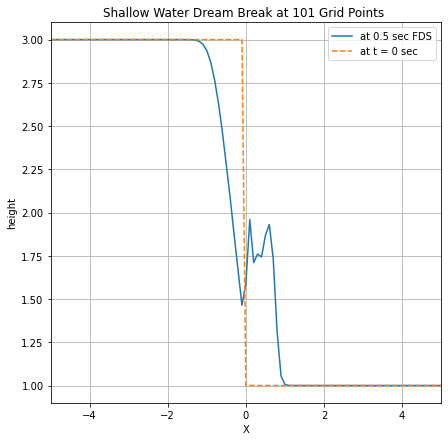

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "height"
name = "shallow_height_101_FDS_time_half_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

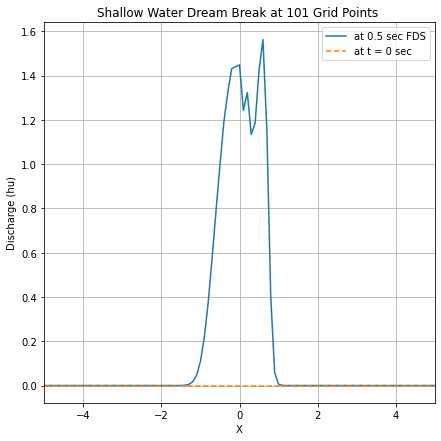

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Discharge (hu)"
name = "shallow_Discharge_101_FDS_time_half_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

In [ ]:
T = 2.0
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

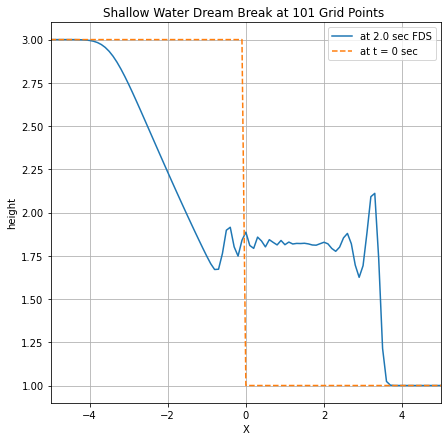

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "height"
name = "shallow_height_101_FDS_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

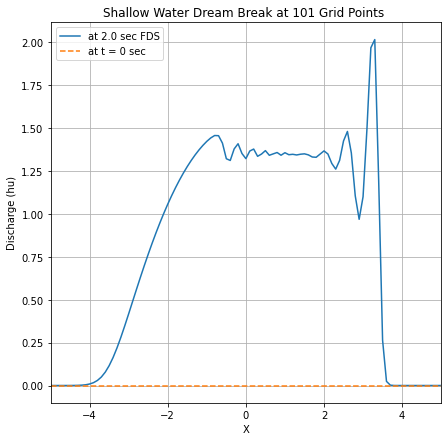

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Discharge (hu)"
name = "shallow_Discharge_101_FDS_time_two_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

## Part 2 - 201 Grid Points

In [ ]:
n = 201
[x, q, dx, g, dim, x_b_l, x_b_r] = IC(n, "shallow_water")
q_old = copy.deepcopy(q)

In [ ]:
T = 0.5
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

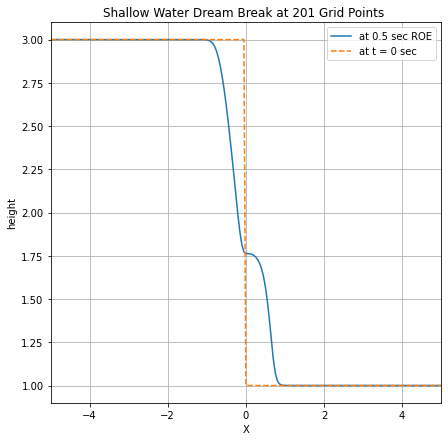

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "height"
name = "shallow_height_201_ROE_time_half_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

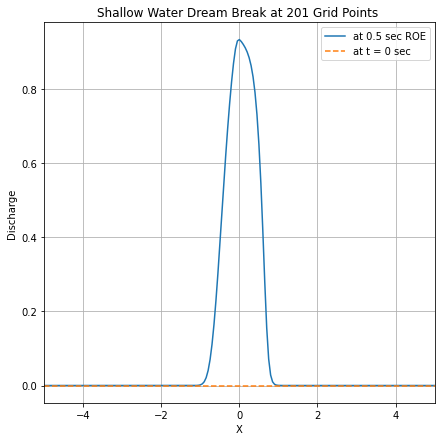

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Discharge"
name = "shallow_Discharge_201_ROE_time_half_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

In [ ]:
T = 2.0
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

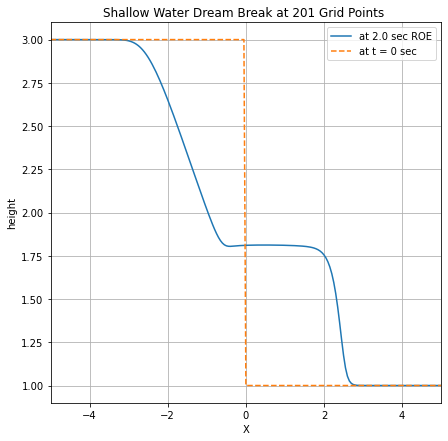

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "height"
name = "shallow_height_201_ROE_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

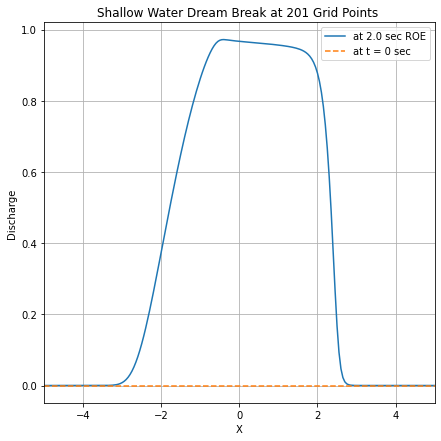

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Discharge"
name = "shallow_Discharge_201_ROE_time_two_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

In [ ]:
T = 0.5
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

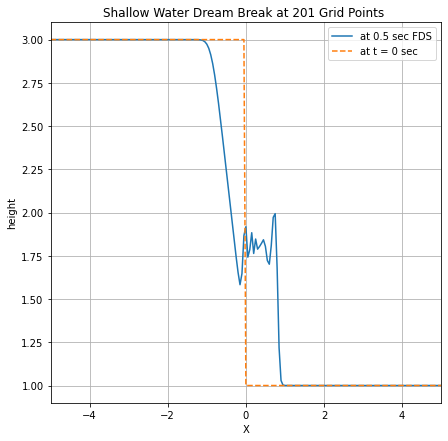

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "height"
name = "shallow_height_201_FDS_time_half_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

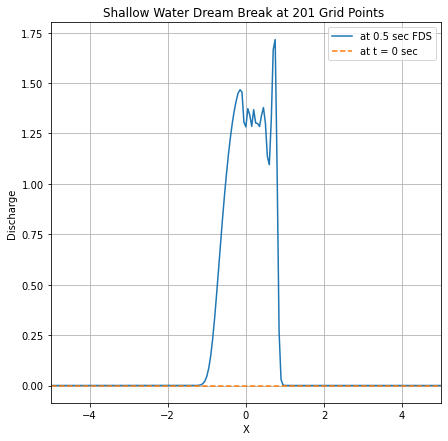

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Discharge"
name = "shallow_Discharge_201_FDS_time_half_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

In [ ]:
T = 2.0
q_new = linearize_shallow_water(n, q_old, g, T, dx, dim, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

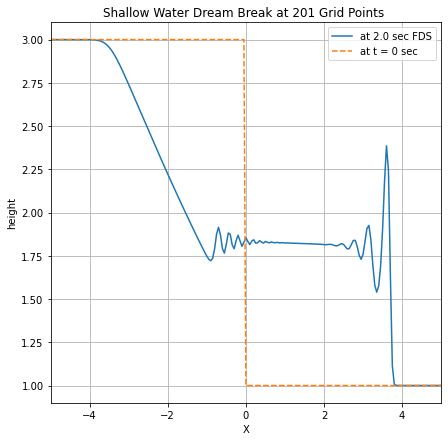

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "height"
name = "shallow_height_201_FDS_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

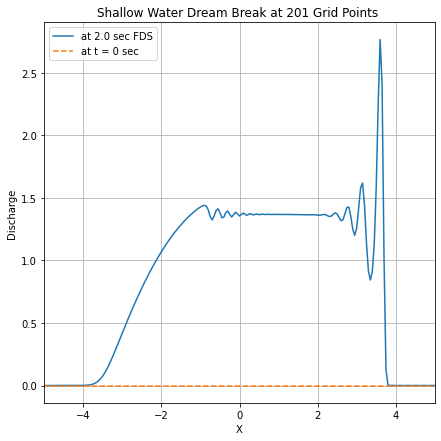

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Discharge"
name = "shallow_Discharge_201_FDS_time_two_second.png"
PLOT(q_new[1], q_old[1], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Shallow Water Dream Break", xlabel, ylabel, name)

---
# Problem 2 | Euler Equation - Sod Shock Problem
---



## Part 1 - 101 Grid Points

In [ ]:
def Euler(n, q, g, T, dx, type):

    n_hat = n-2
    dim = 3

    u = np.zeros(n) # This is actually wrong, u should be an input from the IC and has to be passed into the function
    H = np.zeros(n)
    p = np.zeros(n)
    
    q_minus_hat = np.zeros([dim,n_hat])
    q_plus_hat = np.zeros([dim,n_hat])    

    diff_q_minus = np.zeros([dim,n_hat])
    diff_q_plus = np.zeros([dim,n_hat])
    
    u_minus_hat = np.zeros(n_hat)
    u_plus_hat = np.zeros(n_hat)

    H_minus_hat = np.zeros(n_hat)
    H_plus_hat = np.zeros(n_hat)
    
    c_minus_hat = np.zeros(n_hat)
    c_plus_hat = np.zeros(n_hat)
    
    lamda_1_minus_hat = np.zeros(n_hat)
    lamda_2_minus_hat = np.zeros(n_hat)
    lamda_3_minus_hat = np.zeros(n_hat)

    lamda_1_plus_hat = np.zeros(n_hat)    
    lamda_2_plus_hat = np.zeros(n_hat)    
    lamda_3_plus_hat = np.zeros(n_hat) 
    
    r_1_minus_hat = np.zeros([dim,n_hat])
    r_2_minus_hat = np.zeros([dim,n_hat])
    r_3_minus_hat = np.zeros([dim,n_hat])

    r_1_plus_hat = np.zeros([dim,n_hat])       
    r_2_plus_hat = np.zeros([dim,n_hat])    
    r_3_plus_hat = np.zeros([dim,n_hat])
    
    R_minus = np.zeros([n_hat,dim,dim])
    R_plus = np.zeros([n_hat,dim,dim])
    
    a_minus_hat = np.zeros([dim,n_hat])
    a_plus_hat = np.zeros([dim,n_hat])
    
    nu_1_minus = np.zeros(n_hat)
    nu_2_minus = np.zeros(n_hat)
    nu_3_minus = np.zeros(n_hat)

    nu_1_plus = np.zeros(n_hat)    
    nu_2_plus = np.zeros(n_hat)    
    nu_3_plus = np.zeros(n_hat)
    
    diff_f1_minus = np.zeros([dim,n_hat])
    diff_f2_minus = np.zeros([dim,n_hat])
    diff_f3_minus = np.zeros([dim,n_hat])

    diff_f1_plus = np.zeros([dim,n_hat])        
    diff_f2_plus = np.zeros([dim,n_hat])            
    diff_f3_plus = np.zeros([dim,n_hat])       

    f = np.zeros([dim,n])

    f_minus = np.zeros([dim,n_hat])
    f_plus = np.zeros([dim,n_hat])

    F_minus = np.zeros([dim,n_hat])
    F_plus = np.zeros([dim,n_hat])

    q_new = copy.deepcopy(q)

    t = 0
    
    CFL = 0.8
    
    count = 0
    
    while(t<T):  

        q_minus_hat[0,:] = 0.5*(q[0,1:-1] + q[0,0:-2])    
        q_plus_hat[0,:] = 0.5*(q[0,2:] + q[0,1:-1])    

        p[:] = (g - 1)*(q[2,:] - 0.5*q[1,:]**2/q[0,:])
        u[:] = q[1,:]/q[0,:]        
        H[:] = g*p[:]/((g-1)*q[0,:]) + (u[:]**2)/2   

        f[0,:] = q[1,:]
        f[1,:] = q[1,:]**2/q[0,:] + p[:]
        f[2,:] = u*(p[:] + q[2,:])

        f_minus[:,:] = 0.5*(f[:,1:-1] + f[:,0:-2])
        f_plus[:,:] = 0.5*(f[:,2:] + f[:,1:-1])            
        
        u_minus_hat[:] = ((q[0,1:-1]**(0.5))*u[1:-1] + (q[0,0:-2]**(0.5))*u[0:-2])/(q[0,1:-1]**0.5 + q[0,0:-2]**0.5)
        u_plus_hat[:] = ((q[0,2:]**(0.5))*u[2:] + (q[0,1:-1]**(0.5))*u[1:-1])/(q[0,2:]**0.5 + q[0,1:-1]**0.5) 

        H_minus_hat[:] = ((q[0,1:-1]**(0.5))*H[1:-1] + (q[0,0:-2]**(0.5))*H[0:-2])/(q[0,1:-1]**0.5 + q[0,0:-2]**0.5)
        H_plus_hat[:] = ((q[0,2:]**(0.5))*H[2:] + (q[0,1:-1]**(0.5))*H[1:-1])/(q[0,2:]**0.5 + q[0,1:-1]**0.5)                 
        
        c_minus_hat = ((g-1)*(H_minus_hat - (u_minus_hat**2)/2))**0.5
        c_plus_hat = ((g-1)*(H_plus_hat - (u_plus_hat**2)/2))**0.5
        
        lamda_1_minus_hat = u_minus_hat - c_minus_hat
        lamda_1_plus_hat = u_plus_hat - c_plus_hat

        lamda_2_minus_hat = u_minus_hat
        lamda_2_plus_hat = u_plus_hat

        lamda_3_minus_hat = u_minus_hat + c_minus_hat
        lamda_3_plus_hat = u_plus_hat + c_plus_hat

        r_1_minus_hat[0,:] = np.ones(n_hat)
        r_1_minus_hat[1,:] = lamda_1_minus_hat[:]
        r_1_minus_hat[2,:] = H_minus_hat[:] - u_minus_hat[:]*c_minus_hat[:]

        r_1_plus_hat[0,:] = np.ones(n_hat)
        r_1_plus_hat[1,:] = lamda_1_plus_hat[:]
        r_1_plus_hat[2,:] = H_plus_hat[:] - u_plus_hat[:]*c_plus_hat[:]

        r_2_minus_hat[0,:] = np.ones(n_hat)
        r_2_minus_hat[1,:] = lamda_2_minus_hat[:]
        r_2_minus_hat[2,:] = 0.5*lamda_2_minus_hat[:]**2

        r_2_plus_hat[0,:] = np.ones(n_hat)
        r_2_plus_hat[1,:] = lamda_2_plus_hat[:]
        r_2_plus_hat[2,:] = 0.5*lamda_2_plus_hat[:]**2

        r_3_minus_hat[0,:] = np.ones(n_hat)
        r_3_minus_hat[1,:] = lamda_3_minus_hat[:]
        r_3_minus_hat[2,:] = H_minus_hat[:] + u_minus_hat[:]*c_minus_hat[:]

        r_3_plus_hat[0,:] = np.ones(n_hat)
        r_3_plus_hat[1,:] = lamda_3_plus_hat[:]
        r_3_plus_hat[2,:] = H_plus_hat[:] + u_plus_hat[:]*c_plus_hat[:]                

        for i in range(n_hat):

            R_minus[i,0,0] = r_1_minus_hat[0,i]
            R_minus[i,0,1] = r_2_minus_hat[0,i]
            R_minus[i,0,2] = r_3_minus_hat[0,i]

            R_minus[i,1,0] = r_1_minus_hat[1,i]
            R_minus[i,1,1] = r_2_minus_hat[1,i]
            R_minus[i,1,2] = r_3_minus_hat[1,i]

            R_minus[i,2,0] = r_1_minus_hat[2,i]
            R_minus[i,2,1] = r_2_minus_hat[2,i]
            R_minus[i,2,2] = r_3_minus_hat[2,i]            

            R_plus[i,0,0] = r_1_plus_hat[0,i]
            R_plus[i,0,1] = r_2_plus_hat[0,i]
            R_plus[i,0,2] = r_3_plus_hat[0,i]

            R_plus[i,1,0] = r_1_plus_hat[1,i]
            R_plus[i,1,1] = r_2_plus_hat[1,i]
            R_plus[i,1,2] = r_3_plus_hat[1,i]

            R_plus[i,2,0] = r_1_plus_hat[2,i]
            R_plus[i,2,1] = r_2_plus_hat[2,i]
            R_plus[i,2,2] = r_3_plus_hat[2,i]            
        

        diff_q_minus[0,:] = q[0,1:-1] - q[0,0:-2]        
        diff_q_plus[0,:] = q[0,2:] - q[0,1:-1]

        diff_q_minus[1,:] = q[1,1:-1] - q[1,0:-2]
        diff_q_plus[1,:] = q[1,2:] - q[1,1:-1]

        diff_q_minus[2,:] = q[2,1:-1] - q[2,0:-2]
        diff_q_plus[2,:] = q[2,2:] - q[2,1:-1]

        for i in range(n_hat):
            a_minus_hat[:,i] = np.linalg.inv(R_minus[i]) @ diff_q_minus[:,i]
            a_plus_hat[:,i] = np.linalg.inv(R_plus[i]) @ diff_q_plus[:,i]


        for i in range(n_hat):
                      
            if (type == "ROE"):
              diff_f1_minus[:,i] = abs(lamda_1_minus_hat)[i]*(a_minus_hat[0,i] * r_1_minus_hat[:,i])
              diff_f2_minus[:,i] = abs(lamda_2_minus_hat[i])*(a_minus_hat[1,i] * r_2_minus_hat[:,i])
              diff_f3_minus[:,i] = abs(lamda_3_minus_hat[i])*(a_minus_hat[2,i] * r_3_minus_hat[:,i])

              diff_f1_plus[:,i] = abs(lamda_1_plus_hat[i])*(a_plus_hat[0,i] * r_1_plus_hat[:,i])
              diff_f2_plus[:,i] = abs(lamda_2_plus_hat[i])*(a_plus_hat[1,i] * r_2_plus_hat[:,i])
              diff_f3_plus[:,i] = abs(lamda_3_plus_hat[i])*(a_plus_hat[2,i] * r_3_plus_hat[:,i])

              F_minus = f_minus - 0.5*(diff_f1_minus + diff_f2_minus + diff_f3_minus)
              F_plus = f_plus - 0.5*(diff_f1_plus + diff_f2_plus + diff_f3_plus)

            elif (type == "FDS"):
              diff_f1_minus[:,i] = (lamda_1_minus_hat)[i]*(a_minus_hat[0,i] * r_1_minus_hat[:,i])
              diff_f2_minus[:,i] = (lamda_2_minus_hat[i])*(a_minus_hat[1,i] * r_2_minus_hat[:,i])
              diff_f3_minus[:,i] = (lamda_3_minus_hat[i])*(a_minus_hat[2,i] * r_3_minus_hat[:,i])

              diff_f1_plus[:,i] = (lamda_1_plus_hat[i])*(a_plus_hat[0,i] * r_1_plus_hat[:,i])
              diff_f2_plus[:,i] = (lamda_2_plus_hat[i])*(a_plus_hat[1,i] * r_2_plus_hat[:,i])
              diff_f3_plus[:,i] = (lamda_3_plus_hat[i])*(a_plus_hat[2,i] * r_3_plus_hat[:,i])


        max_lamda = max(max(abs(lamda_1_plus_hat[:])),max(abs(lamda_2_plus_hat[:])),max(abs(lamda_1_minus_hat[:])),max(abs(lamda_2_minus_hat[:])),max(abs(lamda_3_minus_hat[:])),max(abs(lamda_3_plus_hat[:])))           
        dt = dx*CFL/max_lamda
        
        count = count+1

        nu_1_minus = lamda_1_minus_hat*dt/dx
        nu_1_plus = lamda_1_plus_hat*dt/dx

        nu_2_minus = lamda_2_minus_hat*dt/dx
        nu_2_plus = lamda_2_plus_hat*dt/dx  

        nu_3_minus = lamda_3_minus_hat*dt/dx
        nu_3_plus = lamda_3_plus_hat*dt/dx     

         
        if (type == "FDS"):
          q_new[:,1:-1] = q[:,1:-1] - 0.5*(dt/dx)*((1 + nu_1_minus)*diff_f1_minus[:,] + 
                                                  (1 - nu_1_plus)*diff_f1_plus[:,] + 
                                                  (1 + nu_2_minus)*diff_f2_minus[:,] + 
                                                  (1 - nu_2_plus)*diff_f2_plus[:,] + 
                                                  (1 + nu_3_minus)*diff_f3_minus[:,] + 
                                                  (1 - nu_3_plus)*diff_f3_plus[:,])

        elif (type == "ROE"):          
          q_new[:,1:-1] = q[:,1:-1] - (dt/dx)*(F_plus - F_minus)
                
        q_new[:,0] = q_new[:,1]        
        q_new[:,-1] = q_new[:,-2]        
        q = copy.deepcopy(q_new)        

        t = t + dt        
    
    return(q_new)


In [ ]:
n = 101
[x, q, dx, g, dim, x_b_l, x_b_r] = IC(n, "sod_shock")
q_old = copy.deepcopy(q)

In [ ]:
T = 0.25
q_new = Euler(n, q_old, g, T, dx, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

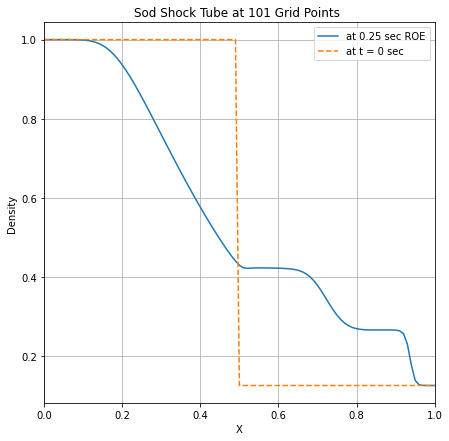

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Density"
name = "shock_Density_101_ROE_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

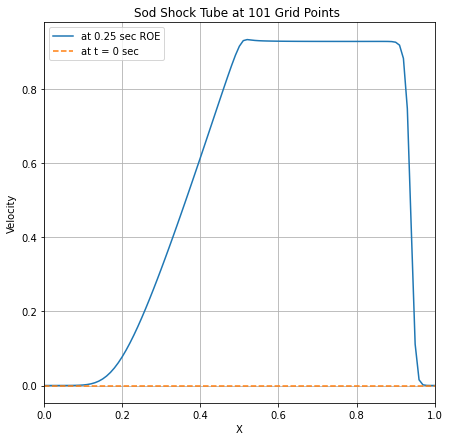

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Velocity"
name = "shock_Velocity_101_ROE_time_two_second.png"
PLOT(q_new[1]/q_new[0], q_old[1]/q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

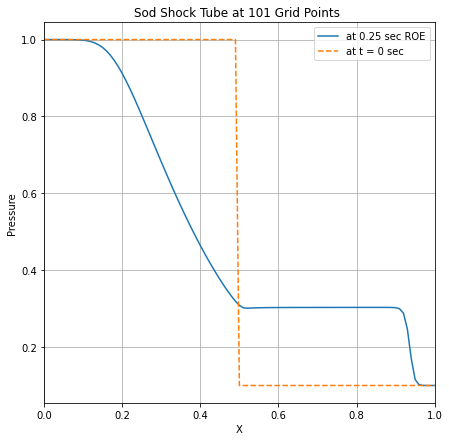

In [ ]:
p_new = np.zeros(n)
p_old = np.zeros(n)
p_new[:] = (g - 1)*(q_new[2,:] - 0.5*q_new[1,:]**2/q_new[0,:])
p_old[:] = (g - 1)*(q_old[2,:] - 0.5*q_old[1,:]**2/q_old[0,:])
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Pressure"
name = "shock_Pressure_101_ROE_time_two_second.png"
PLOT(p_new, p_old, x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

In [ ]:
T = 0.25
q_new = Euler(n, q_old, g, T, dx, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

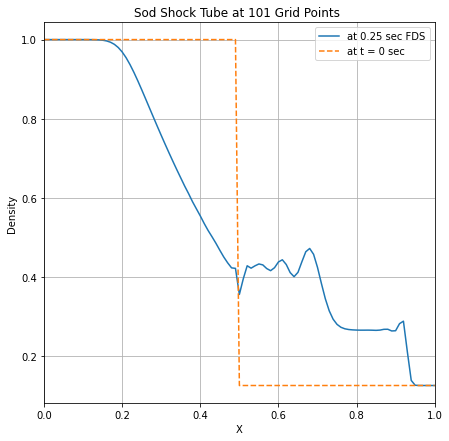

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Density"
name = "shock_Pressure_101_FDS_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

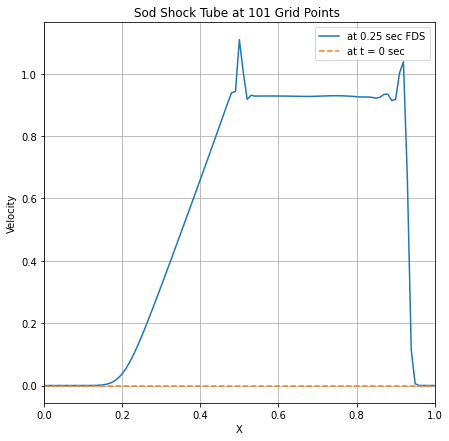

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Velocity"
name = "shock_Velocity_101_FDS_time_two_second.png"
PLOT(q_new[1]/q_new[0], q_old[1]/q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

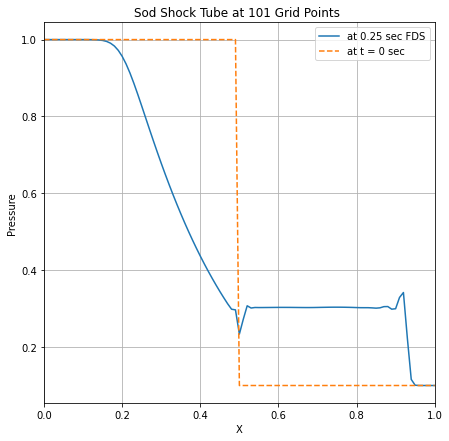

In [ ]:
p_new = np.zeros(n)
p_old = np.zeros(n)
p_new[:] = (g - 1)*(q_new[2,:] - 0.5*q_new[1,:]**2/q_new[0,:])
p_old[:] = (g - 1)*(q_old[2,:] - 0.5*q_old[1,:]**2/q_old[0,:])
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Pressure"
name = "shock_Pressure_101_FDS_time_two_second.png"
PLOT(p_new, p_old, x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

## Part 2 - 201 Grid Points

In [ ]:
n = 201
[x, q, dx, g, dim, x_b_l, x_b_r] = IC(n, "sod_shock")
q_old = copy.deepcopy(q)

In [ ]:
T = 0.25
q_new = Euler(n, q_old, g, T, dx, type[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

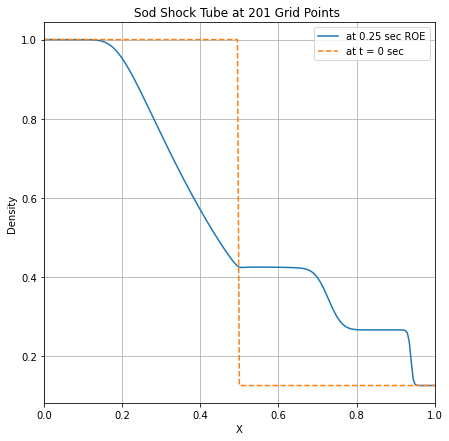

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Density"
name = "shock_Density_201_FDS_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

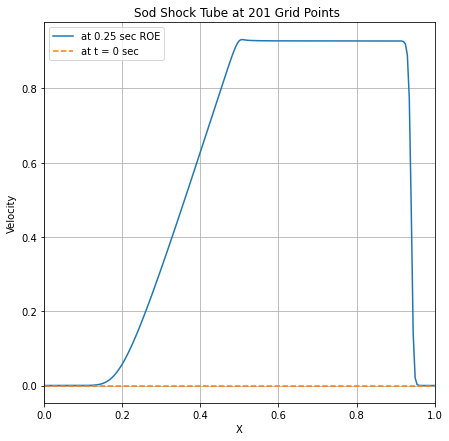

In [ ]:
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Velocity"
name = "shock_Velocity_201_FDS_time_two_second.png"
PLOT(q_new[1]/q_new[0], q_old[1]/q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

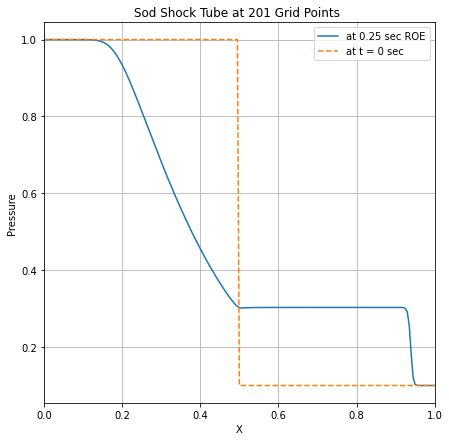

In [ ]:
p_new = np.zeros(n)
p_old = np.zeros(n)
p_new[:] = (g - 1)*(q_new[2,:] - 0.5*q_new[1,:]**2/q_new[0,:])
p_old[:] = (g - 1)*(q_old[2,:] - 0.5*q_old[1,:]**2/q_old[0,:])
time_stamp = str(T)
LEGEND = type[0]
xlabel = "X"
ylabel = "Pressure"
name = "shock_Pressure_201_FDS_time_two_second.png"
PLOT(p_new, p_old, x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

In [ ]:
n = 201
[x, q, dx, g, dim, x_b_l, x_b_r] = IC(n, "sod_shock")
q_old = copy.deepcopy(q)

T = 0.25
q_new = Euler(n, q_old, g, T, dx, type[1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

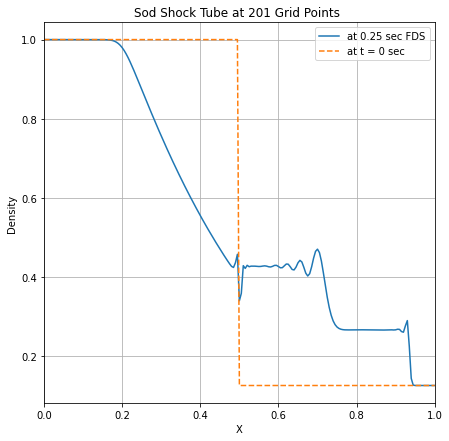

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Density"
name = "shock_Density_201_FDS_time_two_second.png"
PLOT(q_new[0], q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

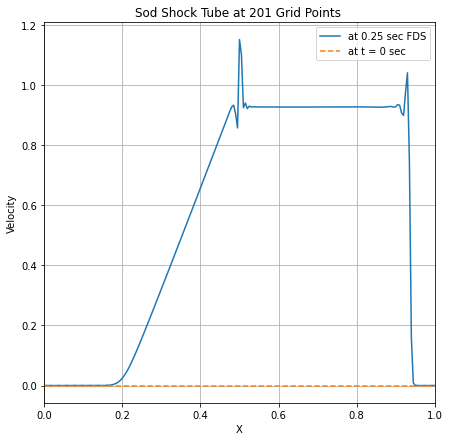

In [ ]:
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Velocity"
name = "shock_Velocity_201_FDS_time_two_second.png"
PLOT(q_new[1]/q_new[0], q_old[1]/q_old[0], x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

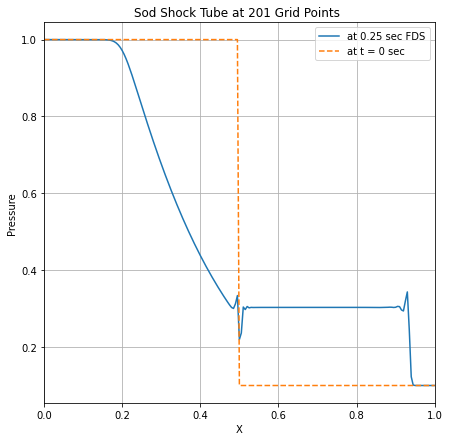

In [ ]:
p_new = np.zeros(n)
p_old = np.zeros(n)
p_new[:] = (g - 1)*(q_new[2,:] - 0.5*q_new[1,:]**2/q_new[0,:])
p_old[:] = (g - 1)*(q_old[2,:] - 0.5*q_old[1,:]**2/q_old[0,:])
time_stamp = str(T)
LEGEND = type[1]
xlabel = "X"
ylabel = "Pressure"
name = "shock_Pressure_201_FDS_time_two_second.png"
PLOT(p_new, p_old, x, x_b_l, x_b_r, time_stamp, LEGEND, str(n),"Sod Shock Tube", xlabel, ylabel, name)